In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [2]:
df = pd.read_csv("final.csv")
df

,team,season,points
0,BOS,2013,"[1, 4, 7, 8, 8, 11, 11, 12, 12, 12, 12, 15, 16..."
1,CHI,2013,"[1, 1, 1, 2, 2, 2, 5, 8, 8, 11, 12, 12, 15, 18..."
2,KC,2013,"[1, 4, 7, 7, 10, 10, 10, 13, 16, 16, 19, 20, 2..."
3,NJY,2013,"[3, 6, 6, 7, 10, 13, 16, 19, 22, 22, 25, 26, 2..."
4,POR,2013,"[1, 4, 7, 10, 13, 13, 16, 19, 19, 22, 25, 26, ..."
...,...,...,...
93,ORL,2023,"[0, 0, 0, 0, 3, 6, 7, 10, 10, 10, 13, 13, 13, ..."
94,POR,2023,"[3, 6, 7, 10, 11, 12, 12, 15, 16, 19, 19, 22, ..."
95,RGN,2023,"[0, 3, 6, 9, 10, 13, 13, 13, 16, 16, 19, 20, 2..."
96,SD,2023,"[3, 6, 6, 9, 9, 9, 12, 15, 16, 19, 20, 20, 20,..."


In [3]:
halfway = False

In [11]:
results = pd.DataFrame([], columns=["season", "best", "worst"])
for season in df["season"].unique():
    best = 0
    worst = 1
    data = df[df["season"] == season]
    for team in data["team"].unique():
        points = list(
            map(int, data[data["team"] == team]["points"].iloc[0][1:-1].split(", "))
        )

        idx = int(len(points) / 2) - 1 if halfway else int(len(points)) - 1
        val = points[idx] / (3 * len(points) / (2 if halfway else 1))
        if val > best:
            best = val
        if val < worst:
            worst = val

    results.loc[len(results.index)] = [season, best, worst]

results["season"] = results["season"].astype(int)
results

,season,best,worst
0,2013,0.575758,0.212121
1,2014,0.750000,0.250000
2,2015,0.716667,0.250000
3,2016,0.683333,0.183333
4,2017,0.680556,0.263889
5,2018,0.791667,0.125000
6,2019,0.680556,0.222222
7,2021,0.611111,0.222222
8,2022,0.606061,0.196970
9,2023,0.560606,0.363636


<Figure size 864x576 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

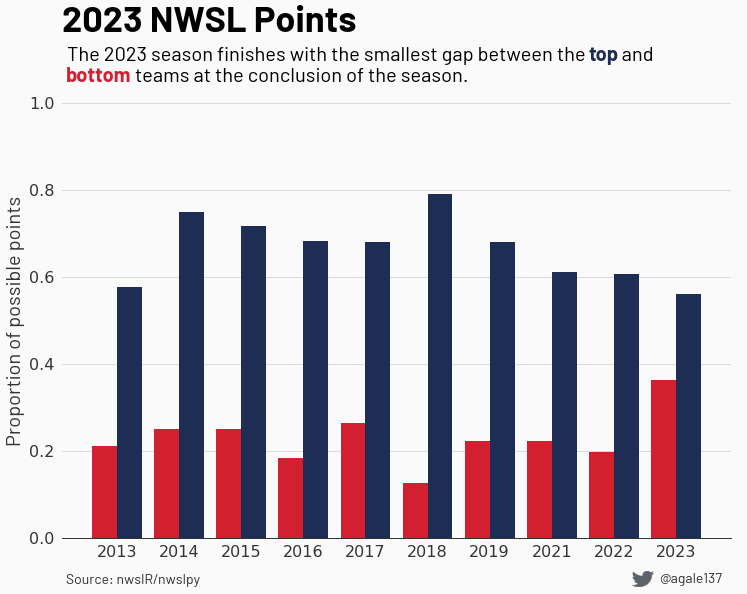

In [20]:
plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=200, facecolor=Colors.WHITE)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

best = "#1d2d53"
worst = "#d22030"

plt.bar(results.index - 0.2, results["worst"], 0.4, color=worst)
plt.bar(results.index + 0.2, results["best"], 0.4, color = best)

# Axes and ticks
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)
ax.set_ylim([0, 1])
ax.set_xticks(results.index)
ax.set_xticklabels(results["season"])
ax.set_ylabel("Proportion of possible points", fontproperties=Fonts.BARLOW,
    size=20, color=Colors.BLACK)

# Title
ax.set_title(
    "2023 NWSL Points",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.8,
    1.05,
    "The 2023 season finishes with the smallest gap between the         and\n                 teams at the conclusion of the season.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

plt.figtext(
    0.735,
    0.954,
    "top",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=best,
)

plt.figtext(
    0.13,
    0.917,
    "bottom",
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=20,
    color=worst,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.78, y=0.04, fs=14, w=0.03)
add_source(fig, "nwslR/nwslpy", x=0.13, y=0.04, fs=14)

# Save image
plt.savefig(
    "best_worst_halfway.png" if halfway else "best_worst.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)